# PCA in randomly generated data

In [4]:
import numpy as np
import pandas as pd

np.random.seed(23)

# ---- Class 1 ----
mu_vec1 = np.array([0, 0, 0])
cov_mat1 = np.array([[1, 0, 0],
                     [0, 1, 0],
                     [0, 0, 1]])

class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df_class1 = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df_class1['target'] = 1

# ---- Class 2 ----
mu_vec2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1, 0, 0],
                     [0, 1, 0],
                     [0, 0, 1]])

class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df_class2 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])
df_class2['target'] = 0

# ---- Combine both ----
df = pd.concat([df_class1, df_class2], ignore_index=True)

# ---- Shuffle dataset ----
df = df.sample(frac=1, random_state=23).reset_index(drop=True)

df.head()


,feature1,feature2,feature3,target
0,-0.331617,-1.632386,0.619114,1
1,1.010229,1.437830,2.327788,0
2,0.241106,-0.952510,-0.136267,1
3,1.676860,4.187503,-0.080565,0
4,2.823378,-0.332863,2.637391,0


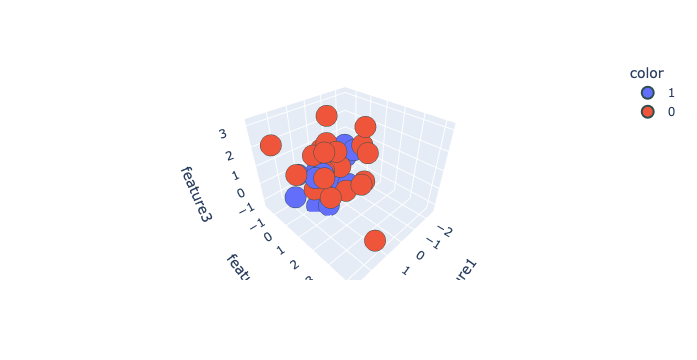

In [5]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [6]:
# Step1 --Applying standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [7]:
# Step2 -- Find Covariance Matrix
covariance_matrix  = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [8]:
#  Step 3 -- Finding EigenValue and EigenVector

eigen_values,eigen_vectors = np.linalg.eig(covariance_matrix)



In [9]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [11]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


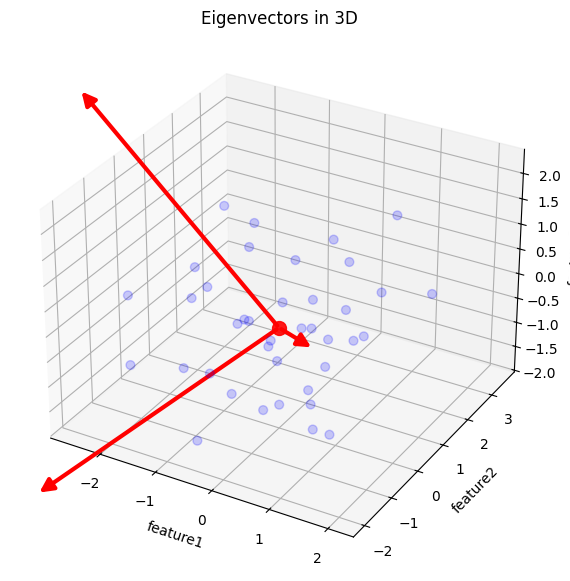

In [22]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

# ----------------------------
# Arrow3D class (FIXED)
# ----------------------------
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.get_proj())
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)  # used for depth ordering

    def draw(self, renderer):
        self.do_3d_projection(renderer)
        super().draw(renderer)


# ----------------------------
# Plotting
# ----------------------------
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot dataset points
ax.scatter(df['feature1'], df['feature2'], df['feature3'],
           s=40, c='blue', alpha=0.2)

# Mean point (center)
mean_x = df['feature1'].mean()
mean_y = df['feature2'].mean()
mean_z = df['feature3'].mean()

ax.scatter([mean_x], [mean_y], [mean_z],
           s=100, c='red', alpha=0.9)

# Draw eigenvectors
scale = 5   # change this if arrows look too small/large

for v in eigen_vectors.T:
    arrow = Arrow3D([mean_x, mean_x + scale * v[0]],
                    [mean_y, mean_y + scale * v[1]],
                    [mean_z, mean_z + scale * v[2]],
                    mutation_scale=20,
                    lw=3,
                    arrowstyle="-|>",
                    color="red")
    ax.add_artist(arrow)

# Labels
ax.set_xlabel("feature1")
ax.set_ylabel("feature2")
ax.set_zlabel("feature3")

plt.title("Eigenvectors in 3D")
plt.show()


In [15]:
pc = eigen_vectors[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [17]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)

new_df = pd.DataFrame(transformed_df,columns = ['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,1.726114,0.492511,1
1,-0.220797,-1.441911,0
2,0.688605,0.658084,1
3,-3.367715,-0.254627,0
4,0.227326,-2.669841,0


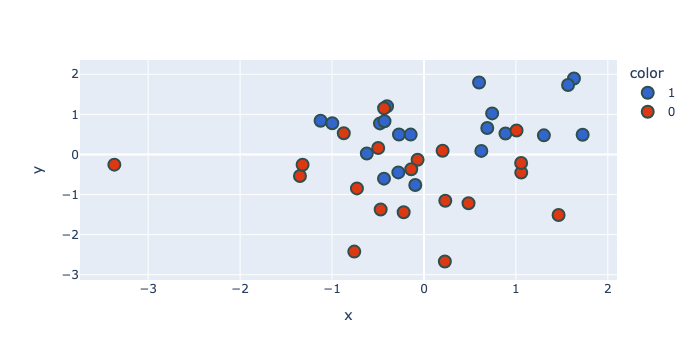

In [19]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()
     